In [8]:
!pip install semopy==2.3.11

In [9]:
import numpy as np
import pandas as pd
import semopy as sem

# 1. 合成データの生成
# 乱数のシードを設定（再現性のため）
np.random.seed(0)

# サンプルサイズ
N = 200

# TVCM（テレビCMの視聴者関心度［独自指標］）のデータを生成
TV_CM = np.random.normal(50, 10, N)

# 気温（Temperature_C、摂氏）のデータを生成。範囲は10~35℃。
Temperature_C = np.random.uniform(10, 35, N)

# ノイズ（Noise）のデータを生成
Noise = np.random.normal(0, 5, N)

# 炭酸飲料の売上（Soda_Sales）を生成。TV_CMとTemperature_Cの影響を強くする。
Soda_Sales = 10 + 0.5 * TV_CM + 2.0 * Temperature_C + Noise

# データフレームを作成
data = pd.DataFrame({
    'TV_CM': TV_CM,
    'Temperature_C': Temperature_C,
    'Soda_Sales': Soda_Sales
})

In [10]:
# SEMモデルの定義
model_desc = """
# 回帰分析
Soda_Sales ~ TV_CM + Temperature_C
"""

In [11]:
mod = sem.Model(model_desc)
res = mod.fit(data)
print(res)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.000
Number of iterations: 12
Params: 0.513 2.043 26.145


In [12]:
stats = sem.calc_stats(mod)
print(stats.T)

                      Value
DoF            3.000000e+00
DoF Baseline   5.000000e+00
chi2           1.050434e-04
chi2 p-value   9.999997e-01
chi2 Baseline  4.891441e+02
CFI            1.006196e+00
GFI            9.999998e-01
AGFI           9.999996e-01
NFI            9.999998e-01
TLI            1.010327e+00
RMSEA          0.000000e+00
AIC            5.999999e+00
BIC            1.589495e+01
LogLik         5.252169e-07


In [13]:
# モデルパラメータの確認
ins = mod.inspect()
print(ins)

         lval  op           rval   Estimate  Std. Err    z-value  p-value
0  Soda_Sales   ~          TV_CM   0.513118  0.035408  14.491412      0.0
1  Soda_Sales   ~  Temperature_C   2.043452  0.047345  43.160776      0.0
2  Soda_Sales  ~~     Soda_Sales  26.145319  2.614532  10.000000      0.0


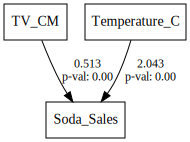

In [14]:
# SEMの可視化
sem.semplot(mod, "business_case_SEM.png")